In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.utils.validation import check_random_state

In [2]:
data, targets = fetch_olivetti_faces(return_X_y=True)
data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/arnaldoch/scikit_learn_data


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [3]:
data.shape

(400, 4096)

In [4]:
np.sqrt(4096)

64.0

In [5]:
targets

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [6]:
targets.shape

(400,)

In [7]:
data[0].reshape(64,64)

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

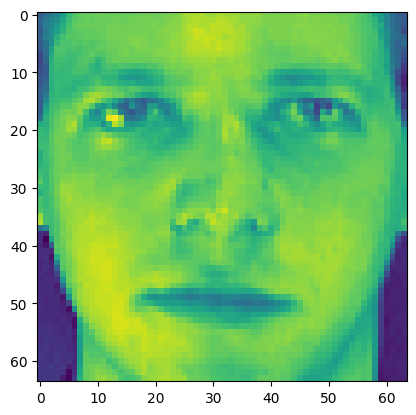

In [8]:
plt.imshow(data[0].reshape(64,64))
plt.show()

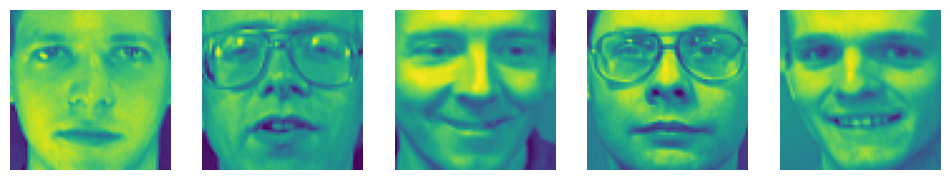

In [9]:
fig, ax = plt.subplots(1,5,figsize=(12,20))
for i in range(5):
    ax[i].imshow(data[i*10].reshape(64,64))
    ax[i].axis('off')
plt.show()

In [10]:
train = data[targets < 30]
test = data[targets >= 30]

In [11]:
n_faces = 5
rng = check_random_state(4)
faces_ids = rng.randint(test.shape[0],size=(n_faces,))
test = test[faces_ids,:]

In [12]:
n_pixels = data.shape[1]
n_pixels


4096

In [13]:
(n_pixels + 1) // 2

2048

In [14]:
X_train = train[:,:(n_pixels + 1) // 2]
y_train = train[:,n_pixels // 2:]
X_test = test[:,:(n_pixels + 1) // 2]
y_test = test[:,n_pixels // 2:]

In [15]:
MODELS = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

In [17]:
y_hat_predict = dict()
for name, model in MODELS.items():
    model.fit(X_train,y_train)
    y_hat_predict[name] = model.predict(X_test)

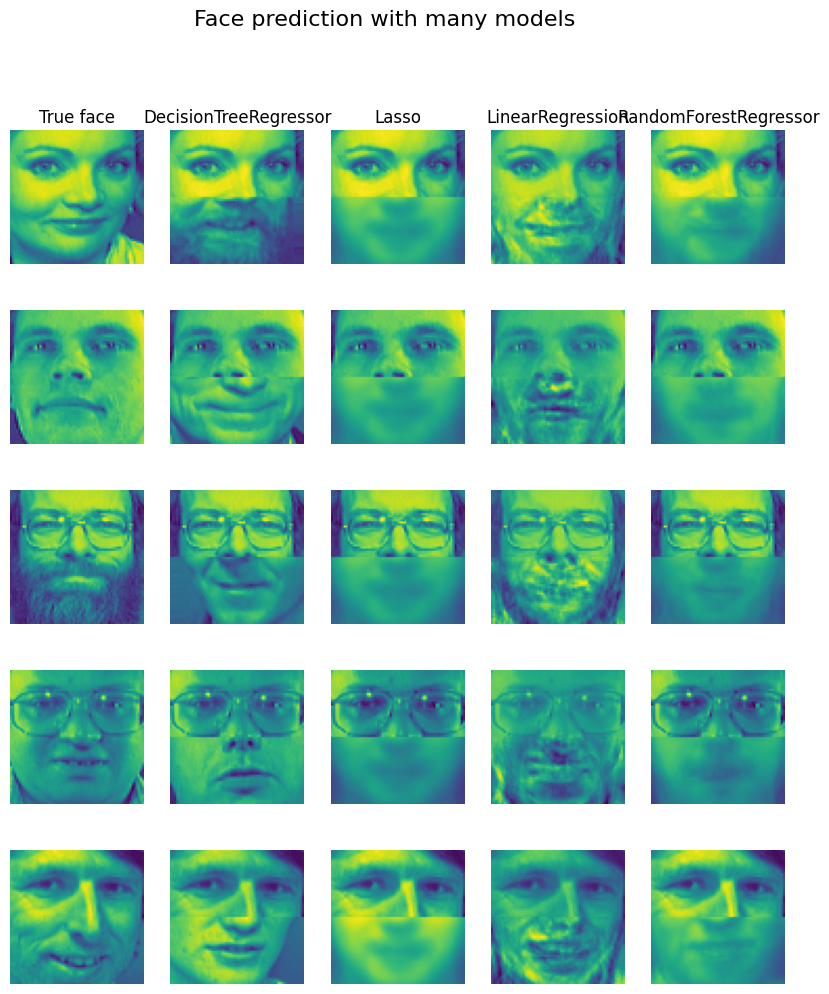

In [18]:
image_shape = (64,64)
n_cols = 1 + len(MODELS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle('Face prediction with many models',size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i],y_test[i]))
    if i:
        sub = plt.subplot(n_faces,n_cols,i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces,n_cols,i * n_cols + 1,title='True face')
    sub.axis('off')
    sub.imshow(true_face.reshape(image_shape))
    for j, est in enumerate(sorted(MODELS)):
        completed_face = np.hstack((X_test[i],y_hat_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces,n_cols,i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces,n_cols,i * n_cols + 2 + j, title=est)
        sub.axis('off')
        sub.imshow(completed_face.reshape(image_shape))
plt.show() 